# Import libraries

In [172]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

# Read data

In [173]:
train = pd.read_csv('../Project1/sign_mnist_train.csv')
test = pd.read_csv('../Project1/sign_mnist_test.csv')

In [174]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


# Convert dara frames into arrays

In [175]:
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [176]:
print(train_set.shape)
print(test_set.shape)

(27455, 785)
(7172, 785)


# class labels for the images

In [177]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

# Verify an image class label

(-0.5, 27.5, 27.5, -0.5)

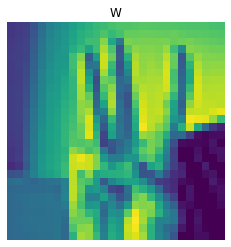

In [178]:
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28)))
plt.imshow(train_set[i,1:].reshape((28,28)))
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

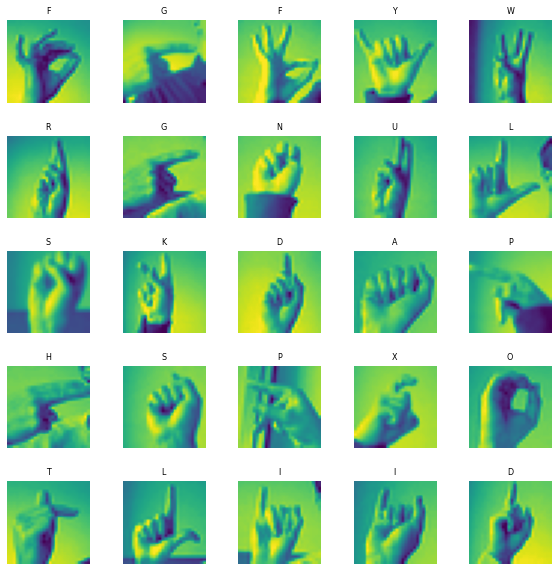

In [179]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [180]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:]
y_train = train_set[:, 0]

X_test = test_set[:, 1:]
y_test = test_set[:,0]

In [181]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(27455, 784)
(27455,)
(7172, 784)


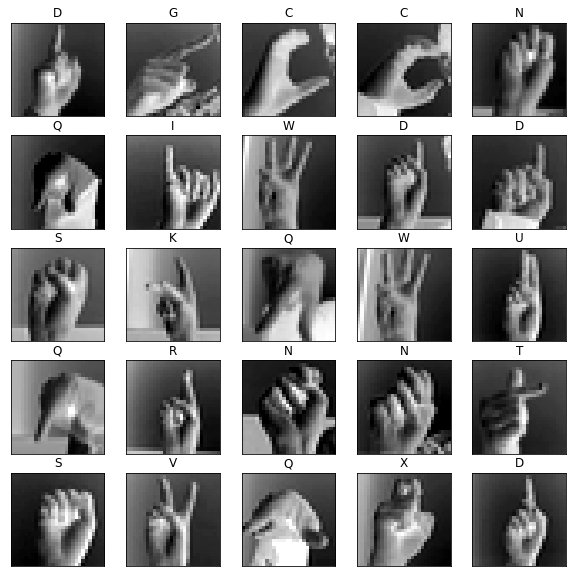

In [182]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [183]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [184]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [185]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [186]:
#Create a Image Generator for X_train
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.0, rotation_range=15, width_shift_range=0.15,
    height_shift_range=0.15, zoom_range=0.2, fill_mode='nearest', horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow(X_train, y_train, batch_size=X_train.shape[0])
test_generator =  test_datagen.flow(X_test,y_test,batch_size=X_test.shape[0])
valid_generator = valid_datagen.flow(X_validate,y_validate,batch_size=X_validate.shape[0])

for x, y in test_generator:
    X_test = x
    y_test = y
    break
for x, y in train_generator:
    X_train = x
    y_train = y
    break
for x, y in valid_generator:
    X_validate = x
    y_validate = y
    break

In [16]:
import tensorflow.keras as keras
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [49]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(units = 26, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
batch_normalization_15 (Batc (None, 3, 3, 128)         512       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 128)        

In [50]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train,
                        batch_size = 512,
                        epochs = 50,
                        verbose = 1,
                        validation_data = (X_validate, y_validate),
                       callbacks = [
                           keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)])

Epoch 1/50
86/86 [==============================] - 13s 143ms/step - loss: 2.8096 - accuracy: 0.1648 - val_loss: 2.8648 - val_accuracy: 0.1495
Epoch 2/50
86/86 [==============================] - 12s 139ms/step - loss: 1.5181 - accuracy: 0.5012 - val_loss: 2.3961 - val_accuracy: 0.2448
Epoch 3/50
86/86 [==============================] - 10s 120ms/step - loss: 1.0075 - accuracy: 0.6666 - val_loss: 1.8372 - val_accuracy: 0.5305
Epoch 4/50
86/86 [==============================] - 12s 137ms/step - loss: 0.7183 - accuracy: 0.7623 - val_loss: 1.1012 - val_accuracy: 0.7855
Epoch 5/50
86/86 [==============================] - 12s 135ms/step - loss: 0.5492 - accuracy: 0.8158 - val_loss: 0.6329 - val_accuracy: 0.8621
Epoch 6/50
86/86 [==============================] - 10s 113ms/step - loss: 0.4465 - accuracy: 0.8519 - val_loss: 0.4512 - val_accuracy: 0.8769
Epoch 7/50
86/86 [==============================] - 10s 115ms/step - loss: 0.3627 - accuracy: 0.8796 - val_loss: 0.2965 - val_accuracy: 0.9064

Text(0.5, 1.0, 'Accuracy evolution')

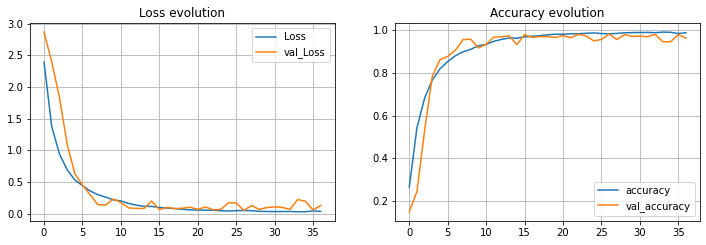

In [128]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [187]:
score = cnn_model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = cnn_model.evaluate(X_validate, y_validate, verbose = 0) 
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

score = cnn_model.evaluate(X_train, y_train, verbose = 0) 
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Test loss: 0.17212752997875214
Test accuracy: 0.9558003544807434
Validation loss: 0.13054902851581573
Validation accuracy: 0.9626661539077759
Train loss: 0.47518765926361084
Train accuracy: 0.8876343369483948


In [188]:
#Predictions for the test data
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

In [189]:
print(X_test[0].shape)

(28, 28, 1)


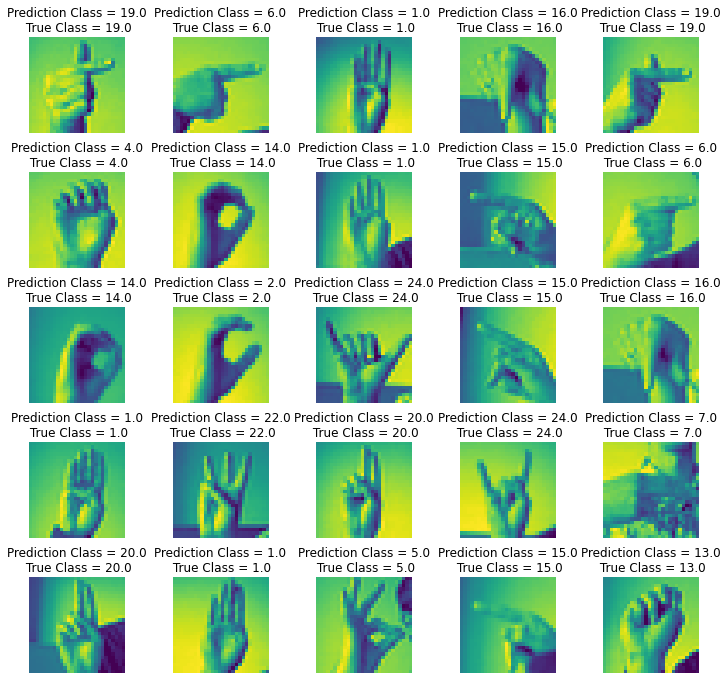

In [224]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i+10].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i+10]:0.1f}\n True Class = {y_test[i+10]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [191]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [146]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Normalized Confusion matrix')
plt.show()

In [ ]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=False, title='Non-Normalized Confusion matrix')
plt.show()

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

(28, 28, 1)
14
4


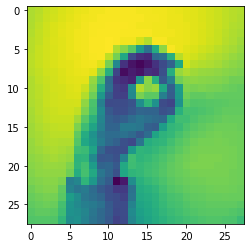

In [210]:
plt.imshow(X_test[16])
print(X_test[16].shape)
print(np.argmax(cnn_model.predict(X_test[16].reshape(1,28,28,1)), axis=-1)[0])

image = np.array(Image.open('./test_images/test_image_3.jpg').convert('L').resize((28,28)))
image = image.reshape(1,28,28,1) / 255.0
print(np.argmax(cnn_model.predict(image), axis=-1)[0])
plt.imshow(image[0])

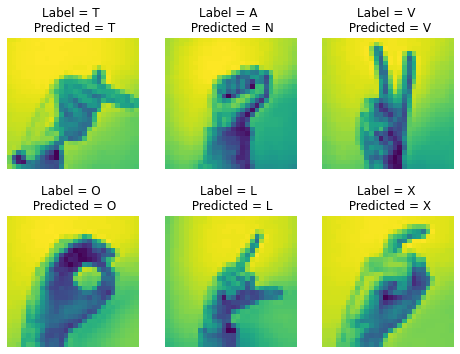

In [232]:
# load image as pixel array
images = [0] * 6
labels = [19, 0, 21, 14, 11, 23]
leters = ["T", "A", "V", "O", "L", "X"]
predicted = ["T", "N", "V", "O", "L", "X"]

W_grid = 3
L_grid = 2
fig, axes = plt.subplots(L_grid, W_grid, figsize = (8,6))
axes = axes.ravel()
for i in np.arange(0, W_grid * L_grid):
    image = np.array(Image.open('./test_images/image_'+str(i+1)+'.jpg').convert('L').resize((28,28)))
    axes[i].imshow(image)
    
    image = image.reshape(1,28,28,1) / 255.0
    images[i] = image
    
    pred = np.argmax(cnn_model.predict(image), axis=-1)[0]
    axes[i].set_title(f"Label = {leters[i]} \n Predicted = {predicted[i]}")
    
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.2)

In [220]:
print(images[0].shape)
print(X_test.shape)

(1, 28, 28, 1)
(7172, 28, 28, 1)


In [205]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

In [113]:
predicted_classes[0]

23

In [ ]:
#Visualize predictions
L = 3
W = 2

fig, axes = plt.subplots(L, W, figsize = (8, 6))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)